<a href="https://colab.research.google.com/github/Bhaskar-kumar-jha/SCT_ML_03/blob/main/SCT_ML_Task3_SVM_CatDog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.zip to train.zip


In [3]:
import zipfile

zip_path = "/content/train.zip"  # or change it if your file is named differently

if zipfile.is_zipfile(zip_path):
    print("✅ ZIP file is valid. You can proceed to extract it.")
else:
    print("❌ The file is NOT a valid ZIP. Please re-upload it.")


✅ ZIP file is valid. You can proceed to extract it.


In [4]:
import zipfile
import os

zip_path = "/content/train.zip"  # use the correct path of your uploaded zip
extract_path = "/content/train"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete!")


✅ Extraction complete!


In [5]:
import cv2
import numpy as np
import os
from tqdm import tqdm

data_dir = "/content/train"
categories = ["cat", "dog"]
data = []

img_size = 64  # resize images to 64x64

for category in categories:
    path = data_dir
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
        if category in img:
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (img_size, img_size))
                data.append([new_array, class_num])
            except Exception as e:
                pass

print("✅ Image loading done. Total samples:", len(data))


100%|██████████| 1/1 [00:00<00:00, 2600.31it/s]

✅ Image loading done. Total samples: 0


In [6]:
import os

files = os.listdir("/content/train")
print("Total files:", len(files))
print("Sample files:", files[:10])


Total files: 1
Sample files: ['train']


In [7]:
data_dir = "/content/train/train"  # <- double "train"


In [8]:
import cv2
import numpy as np
import os
from tqdm import tqdm

data_dir = "/content/train/train"  # 👈 updated path
categories = ["cat", "dog"]
data = []

img_size = 64  # resize images to 64x64

for category in categories:
    path = data_dir
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
        if category in img:
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (img_size, img_size))
                data.append([new_array, class_num])
            except Exception as e:
                pass

print("✅ Image loading done. Total samples:", len(data))


100%|██████████| 25000/25000 [00:16<00:00, 1556.08it/s]

✅ Image loading done. Total samples: 25000


In [9]:
import random
from sklearn.model_selection import train_test_split

# Shuffle the data to avoid order bias
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

# Convert to NumPy arrays
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

# Normalize the pixel values to [0, 1]
X = X / 255.0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data prepared:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


✅ Data prepared:
X_train shape: (20000, 64, 64, 3)
X_test shape: (5000, 64, 64, 3)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Cat or Dog)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 177ms/step - accuracy: 0.5919 - loss: 0.6644 - val_accuracy: 0.7262 - val_loss: 0.5364
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 138s 170ms/step - accuracy: 0.7445 - loss: 0.5237 - val_accuracy: 0.7695 - val_loss: 0.4786
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 165ms/step - accuracy: 0.7792 - loss: 0.4666 - val_accuracy: 0.7908 - val_loss: 0.4381
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 164ms/step - accuracy: 0.8026 - loss: 0.4267 - val_accuracy: 0.8098 - val_loss: 0.4171
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 161ms/step - accuracy: 0.8305 - loss: 0.3773 - val_accuracy: 0.8135 - val_loss: 0.4066


In [11]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"❌ Test Loss: {test_loss:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7989 - loss: 0.4415

✅ Test Accuracy: 80.40%
❌ Test Loss: 0.4294


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


<ipython-input-17-2255675819>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(prediction[0] > 0.5)  # 0 for cat, 1 for dog


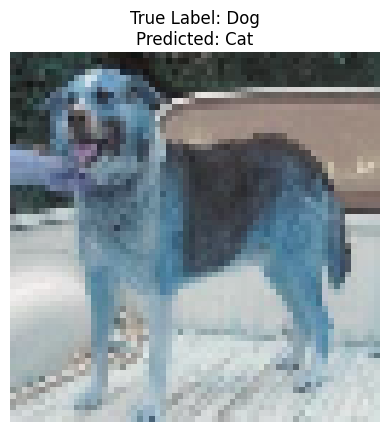

In [17]:
import matplotlib.pyplot as plt

# Pick a random test image
random_index = random.randint(0, len(X_test) - 1)
image = X_test[random_index]
true_label = y_test[random_index]

# Predict
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = int(prediction[0][0] > 0.5)  # 0 for cat, 1 for dog

# Display image
plt.imshow(image)
plt.title(f"True Label: {'Dog' if true_label == 1 else 'Cat'}\nPredicted: {'Dog' if predicted_label == 1 else 'Cat'}")
plt.axis('off')
plt.show()
